In [2]:
from dirmaths import *
import numpy as np

1. Coloration de sommets  
    1.1 Paramètre color

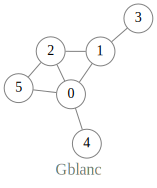

In [3]:
Mat = np.array([[0,1,1,0,1,1],[1,0,1,1,0,0],[1,1,0,0,0,1],[0,1,0,0,0,0],[1,0,0,0,0,0],[1,0,1,0,0,0]])
display(Mat,directed=False,title="Gblanc")

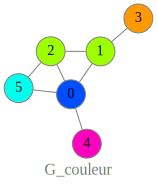

In [4]:
liste_couleur = [5,2,2,1,7,4]
display(Mat,directed=False,color=liste_couleur,title="G_couleur")

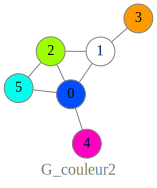

In [5]:
#le nombre 0 correpond au blanc : on l'utilisera comme absence de couleur
couleur2 = [5,0,2,1,7,4]
display(Mat,directed=False,color=couleur2,title="G_couleur2")


    1.2 Exercices de coloration  
        1.2.1 Exercice1

[1, 0, 2, 0, 3, 0]


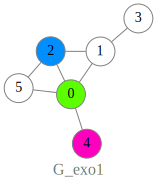

In [6]:
def exo1(M,sommets):
    colors=[]
    for i in range(len(M)):
        colors.append(0)
    i=1
    for sommet in sommets:
        colors[sommet]=i
        i+=1
    return colors
couleur_exo1 = exo1(Mat,[0,2,4])
print(couleur_exo1)
display(Mat,directed=False,color=couleur_exo1,title="G_exo1")

1.2.2 Exercice 2

[2, 3, 1, 0, 0, 4]


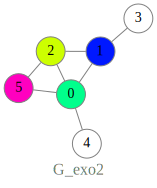

In [7]:
def exo2(M,x):
    colors=[]
    for i in range(len(M)):
        colors.append(0)
    i=2
    colors[x]=1
    for j in range(len(M)):
        if M[x,j]!=0:
            colors[j]=i
            i+=1
    return colors
couleur_exo2 = exo2(Mat,2)
print(couleur_exo2)
display(Mat,directed=False,color=couleur_exo2,title="G_exo2")

1.2.3 Exercice 3

[3, 4] [0]
[5, 0, 0, 1, 1, 0]


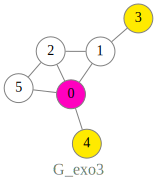

In [8]:
def voisins(M,x):
    L=[]
    for i in range(len(M)):
        if M[x,i]==1:
            L.append(i)
    return L


def degre(M,x):
    L=voisins(M,x)
    res=len(L)
    if x in L:
        res+=1
    return res


def exo3(M):
    colors=[]
    degs=[]
    for i in range(len(M)):
        degs.append(degre(M,i))
        colors.append(0)
    mins=[]
    maxs=[]
    mini=degs.index(min(degs))
    maxi=degs.index(max(degs))
    for i in range(len(degs)):
        elt=degs[i]
        if elt==degs[mini]:
            mins.append(i)
        if elt==degs[maxi]:
            maxs.append(i)
    print(mins,maxs)
    for elt in maxs:
        colors[elt]=5
    for elt in mins:
        colors[elt]=1
    return colors
couleur_exo3 = exo3(Mat)
print(couleur_exo3)
display(Mat,directed=False,color=couleur_exo3,title="G_exo3")

2. Algorithme de coloration de graphes
2.1 Algorithme Glouton Simple
2.1.1 Exercice préliminaire

In [9]:
def exo4(M,sommet,L):
    cols=[]
    for i in range(len(M)):
        cols.append(0)
    col=0
    i=1
    while col==0:
        if i not in L:
            col=i
        i+=1
    cols[sommet]=col
    return cols
couleur_exo4 = exo4(Mat,2,[1,4,5,2])
### le sommet 2 devrait être colorer avec la couleur 3
### (3 est bien le plus petit entier qui n'est pas dans [1,4,5,2])

print(couleur_exo4)

[0, 0, 3, 0, 0, 0]


2.1.2 Ecriture de l'algorithme glouton simple

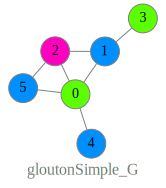

In [10]:
def gloutonSimple(M):
    S=[]
    for i in range(len(M)):
        S.append(i)
    cols=[]
    for i in range(len(M)):
        cols.append(0)
    for x in S:
        L=[]
        les_voisins=voisins(M,x)
        for elt in les_voisins:
            L.append(cols[elt])
        pc=exo4(M,x,L)[x]
        cols[x]=pc
    return cols
couleur_gloutonSimple_mat = gloutonSimple(Mat)
display(Mat,directed=False,title='gloutonSimple_G',color=couleur_gloutonSimple_mat)

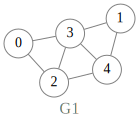

In [11]:
M1=np.array([[0,0,1,1,0],
             [0,0,0,1,1],
             [1,0,0,1,1],
             [1,1,1,0,1],
             [0,1,1,1,0]])
display(M1,directed=False, title='G1')

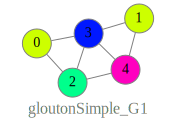

In [12]:
couleur_gloutonSimple = gloutonSimple(M1)
display(M1,directed=False,title='gloutonSimple_G1',color=couleur_gloutonSimple)


La couleur optenue n'est pas optimale car on peut trouver une configuration telle qu'il n'y ai que trois couleurs utilisées cf ci-dessous:

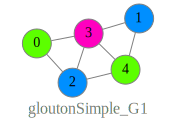

In [13]:
display(M1,directed=False,title='gloutonSimple_G1',color=[1,2,2,3,1])

2.2 Algorithme Glouton   
    2.2.1 Fonction lambda

In [14]:
###Construisons une fonction qui calcule le carré d'un nombre
def carre(x):
    return x**2

###la même chose avec une fonction lambda
lambda x : x**2
print(carre(3), (lambda x : x**2)(3))
###Construisons une fonction qui calcule la somme des carrés de deux nombres
def somme_carres(x,y):
    return x**2 + y**2

###la même chose avecune fonction lambda
lambda x,y : x**2 + y**2

print(somme_carres(2,3), (lambda x,y : x**2 + y**2)(2,3))

9 9
13 13


2.2.2 Tri d'une liste

In [15]:
print(sorted([2,0,4,9,5]))       #tri par ordre croissant, par défaut
print(sorted([2,0,4,9,5],reverse=True))   #tri par ordre décroissant
print(sorted(["AB","AAA","A","BA","B"]))   #tri par ordre alphabétique
#Exemple 1
#tri suivant la longuer de la chaîne de caractère.
print(sorted(["AB","AAA","A","BA","B"], key=len))
print(sorted(["AB","AAA","A","BA","B"], key=len))
#Exemple 2
#définition de la fonction qui calcule le reste dans la division euclidienne modulo 3
def modulo3(n):
  return n%3
  
#tri suivant la valeur du reste modulo 3
print(sorted([2,0,4,9,5],key=modulo3))
#Exemple 3
#même exemple que ci-dessus, mais avec l'utilisation d'une fonction lambda
  
print(sorted([2,0,4,9,5],key= (lambda n : n%3) ))
#Exemple 4
#tri suivant la distance de l'entier par rapport à 5
  
print(sorted([2,0,4,9,5],key= (lambda n : abs(n-5)) ) )

[0, 2, 4, 5, 9]
[9, 5, 4, 2, 0]
['A', 'AAA', 'AB', 'B', 'BA']
['A', 'B', 'AB', 'BA', 'AAA']
['A', 'B', 'AB', 'BA', 'AAA']
[0, 9, 4, 2, 5]
[0, 9, 4, 2, 5]
[5, 4, 2, 9, 0]


2.2.3 Exercice

In [16]:
def tri_degre(M,Bool):
    L=[]
    degs=[]
    for i in range(len(M)):
        L.append(i)
        degs.append(degre(M,i))
    return sorted(L,key=(lambda i : degs[i]),reverse=Bool)
display(M1,directed=False, title='G1')
tri_degre(M1,True)

[3, 2, 4, 0, 1]

2.2.4 Ecriture de l'algorithme glouton

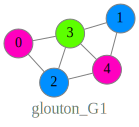

In [17]:
def glouton(M):
    S=tri_degre(M,True)
    cols=[]
    for i in range(len(M)):
        cols.append(0)
    for x in S:
        L=[]
        les_voisins=voisins(M,x)
        for elt in les_voisins:
            L.append(cols[elt])
        pc=exo4(M,x,L)[x]
        cols[x]=pc
    return cols
couleur_glouton = glouton(M1)
display(M1,directed=False,title='glouton_G1',color=couleur_glouton)

3. Algorithme DSATUR
3.1 Ecriture de l'algorithme

In [18]:
def dsatur(g):
    n = np.shape(g)[0]
    couleur = n*[0]
    
    #liste des sommets par ordre de degrés décroissants
    sommets_ord = tri_degre(g,True)
    
       
    #tant qu'il y a des sommets sans couleur    
    while 0 in couleur:
   
        #recherche du sommet à colorer, de degré de saturation maximum
        dsat = n*[0]
        degre_sat_max = 0
        sommetchoisi = sommets_ord[0]
        
        for i in sommets_ord:
            
            #si le sommet i est sans couleur
            if couleur[i]==0:

                vois = voisins(g,i)
               
                #calcul du degré de saturation du sommet i
                couleurvois = []
                for k in vois:
                    if couleur[k]>0:
                        couleurvois = couleurvois+[couleur[k]]
                dsat[i] = len(np.unique(couleurvois))
                
                #le sommet i est-il de degre de saturation maximum ?
                if dsat[i]>degre_sat_max :
                    degre_sat_max = dsat[i]
                    sommetchoisi = i
        
        #couleur des voisins du sommet choisi
        vois_sommetchoisi = voisins(g,sommetchoisi)
        couleurvois_sommetchoisi = []    
        for k in vois_sommetchoisi:
            couleurvois_sommetchoisi = couleurvois_sommetchoisi+[couleur[k]]        
        
        #choix de la plus petite couleur non présente chez les voisins du sommet choisi
        j=1
        while j in couleurvois_sommetchoisi:
            j=j+1
            
        #coloration du sommet choisi avec la couleur trouvée ci-dessus
        couleur[sommetchoisi]=j

    return couleur


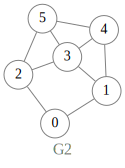

In [19]:
M2 = np.array([[0,1,1,0,0,0],[1,0,0,1,1,0],[1,0,0,1,0,1],[0,1,1,0,1,1],[0,1,0,1,0,1],[0,0,1,1,1,0]])
display(M2,directed=False,title="G2",dispo="neato")

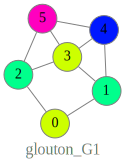

In [20]:
display(M2,directed=False,title='glouton_G1',color=gloutonSimple(M2))

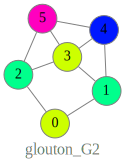

In [21]:
display(M2,directed=False,title="glouton_G2",dispo="neato",color = glouton(M2))

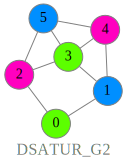

In [22]:
display(M2,directed=False,title="DSATUR_G2",dispo="neato",color = dsatur(M2))

4. Applications
4.1 Théorème des 4 couleurs

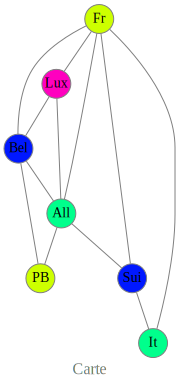

In [23]:
pays=["Fr","Lux","Bel","All","PB","Sui","It"]
MPays=np.array([[0,1,1,1,0,1,1],
             [1,0,1,1,0,0,0],
             [1,1,0,1,1,0,0],
             [1,1,1,0,1,1,0],
             [0,0,1,1,0,0,0],
             [1,0,0,1,0,0,1],
             [1,0,0,0,0,1,0]])
display(MPays,directed=False,label=pays,title="Carte",dispo="dot",color = dsatur(MPays))

4.2 Bonus : Mini Sudoku   

In [24]:
sud=np.array([[0,1,1,1,1,1,0,0,1,0,0,0,1,0,0,0],
              [1,0,1,1,1,1,0,0,0,1,0,0,0,1,0,0],
              [1,1,0,1,0,0,1,1,0,0,1,0,0,0,1,0],
              [1,1,1,0,0,0,1,1,0,0,0,1,0,0,0,1],
              [1,1,0,0,0,1,1,1,1,0,0,0,1,0,0,0],
              [1,1,0,0,1,0,1,1,0,1,0,0,0,1,0,0],
              [0,0,1,1,1,1,0,1,0,0,1,0,0,0,1,0],
              [0,0,1,1,1,1,1,0,0,0,0,1,0,0,0,1],
              [1,0,0,0,1,0,0,0,0,1,1,1,1,1,0,0],
              [0,1,0,0,0,1,0,0,1,0,1,1,1,1,0,0],
              [0,0,1,0,0,0,1,0,1,1,0,1,0,0,1,1],
              [0,0,0,1,0,0,0,1,1,1,1,0,0,0,1,1],
              [1,0,0,0,1,0,0,0,1,1,0,0,0,1,1,1],
              [0,1,0,0,0,1,0,0,1,1,0,0,1,0,1,1],
              [0,0,1,0,0,0,1,0,0,0,1,1,1,1,0,1],
              [0,0,0,1,0,0,0,1,0,0,1,1,1,1,1,0]])

In [48]:
def sudoku(sommets,couleurs,nb):
    g=createMadjSudoku(nb)
    n = len(g)
    couleur = n*[0]
    for elt in sommets:
        couleur[elt]=couleurs[sommets.index(elt)]

    
    #liste des sommets par ordre de degrés décroissants
    sommets_ord = tri_degre(g,True)
    
'''
Mettre la partie while dans une fonction où l'on met en paramètre ce que l'on a besoin
Plus une liste des positions déjà visitées à l'endrois du problème (initialisée à [] au début)
'''
    #tant qu'il y a des sommets sans couleur    
    while 0 in couleur:
   
        #recherche du sommet à colorer, de degré de saturation maximum
        dsat = n*[0]
        degre_sat_max = 0
        sommetchoisi = sommets_ord[0]
        
        for i in sommets_ord:
            
            #si le sommet i est sans couleur
            if couleur[i]==0:

                vois = voisins(g,i)
               
                #calcul du degré de saturation du sommet i
                couleurvois = []
                for k in vois:
                    if couleur[k]>0:
                        couleurvois = couleurvois+[couleur[k]]
                dsat[i] = len(np.unique(couleurvois))
                
                #le sommet i est-il de degre de saturation maximum ?
                if dsat[i]>degre_sat_max :
                    degre_sat_max = dsat[i]
                    sommetchoisi = i
        
        #couleur des voisins du sommet choisi
        vois_sommetchoisi = voisins(g,sommetchoisi)
        couleurvois_sommetchoisi = []    
        for k in vois_sommetchoisi:
            couleurvois_sommetchoisi = couleurvois_sommetchoisi+[couleur[k]]        
        

        
        
        #choix de la plus petite couleur non présente chez les voisins du sommet choisi
        j=1
        while j in couleurvois_sommetchoisi:
            j=j+1
            '''
            Si la couleur dépasse le nbmax, ajouter à la liste des positions la positions 
            choisie lors du choix qui pose problème et retourner directement là en retournant 
            un tuple avec la liste et un booléens
            '''
            
        #coloration du sommet choisi avec la couleur trouvée ci-dessus
        couleur[sommetchoisi]=j

    return couleur

sudoku([0,2,4,11,13],[1,2,3,4,1],2)

[1, 4, 2, 3, 3, 2, 4, 1, 2, 3, 1, 4, 4, 1, 3, 2]

In [50]:
def sudoku_tableau(sommets,couleurs,nb):
    s=sudoku(sommets,couleurs,nb)
    res=[]
    for i in range(nb*nb):
        ligne=[]
        for j in range(nb*nb):
            ligne.append(s[i*nb*nb+j])
        res.append(ligne)
    return np.array(res)
sudoku_tableau([0,2,4,11,13],[1,2,3,4,1],2)

array([[1, 4, 2, 3],
       [3, 2, 4, 1],
       [2, 3, 1, 4],
       [4, 1, 3, 2]])

In [34]:
Msudoku3x3=[]
for i in range(9):
    ligne=[]
    for j in range(9):
        ligne.append((i,j))
    Msudoku3x3.append(ligne)
print("[")
for elt in Msudoku3x3:
    print(elt,",")
    print()
print("]")

[
[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8)] ,

[(1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8)] ,

[(2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8)] ,

[(3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8)] ,

[(4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8)] ,

[(5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8)] ,

[(6, 0), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (6, 8)] ,

[(7, 0), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (7, 8)] ,

[(8, 0), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (8, 6), (8, 7), (8, 8)] ,

]


In [33]:

print("[")
for elt in Madj3x3:
    print(elt,",")
    print()
print("]")

[
[((0, 0), (0, 0)), ((0, 0), (0, 1)), ((0, 0), (0, 2)), ((0, 0), (0, 3)), ((0, 0), (0, 4)), ((0, 0), (0, 5)), ((0, 0), (0, 6)), ((0, 0), (0, 7)), ((0, 0), (0, 8)), ((0, 0), (1, 0)), ((0, 0), (1, 1)), ((0, 0), (1, 2)), ((0, 0), (1, 3)), ((0, 0), (1, 4)), ((0, 0), (1, 5)), ((0, 0), (1, 6)), ((0, 0), (1, 7)), ((0, 0), (1, 8)), ((0, 0), (2, 0)), ((0, 0), (2, 1)), ((0, 0), (2, 2)), ((0, 0), (2, 3)), ((0, 0), (2, 4)), ((0, 0), (2, 5)), ((0, 0), (2, 6)), ((0, 0), (2, 7)), ((0, 0), (2, 8)), ((0, 0), (3, 0)), ((0, 0), (3, 1)), ((0, 0), (3, 2)), ((0, 0), (3, 3)), ((0, 0), (3, 4)), ((0, 0), (3, 5)), ((0, 0), (3, 6)), ((0, 0), (3, 7)), ((0, 0), (3, 8)), ((0, 0), (4, 0)), ((0, 0), (4, 1)), ((0, 0), (4, 2)), ((0, 0), (4, 3)), ((0, 0), (4, 4)), ((0, 0), (4, 5)), ((0, 0), (4, 6)), ((0, 0), (4, 7)), ((0, 0), (4, 8)), ((0, 0), (5, 0)), ((0, 0), (5, 1)), ((0, 0), (5, 2)), ((0, 0), (5, 3)), ((0, 0), (5, 4)), ((0, 0), (5, 5)), ((0, 0), (5, 6)), ((0, 0), (5, 7)), ((0, 0), (5, 8)), ((0, 0), (6, 0)), ((0, 0)

In [41]:
def sudokuVoisinsCase(nb,elt):
    ((i1,j1),(i2,j2))=elt
    return i1//nb==i2//nb and j1//nb==j2//nb

In [45]:
def createMadjSudoku(nb):
    n=nb*nb
    Madj3x3=[]
    for i in range(n*n):
        ligne=[]
        for j in range(n*n):
            ligne.append(((i//n,i%n),(j//n,j%n)))
        Madj3x3.append(ligne)
    Madj=np.zeros((n*n,n*n))
    for i in range(n*n):
        for j in range(n*n):
            elt=Madj3x3[i][j]
            ((i1,j1),(i2,j2))=elt
            ligne=(i1==i2)
            colonne=(j1==j2)
            case=sudokuVoisinsCase(nb,elt)
            if (ligne or colonne or case) and (i1,j1)!=(i2,j2):
                s=1
            else:
                s=0
            Madj[i][j]=s
    
    return Madj
Madj=createMadjSudoku(2)
res=True
i=0
j=0
while res and j<16:
    res=(sud[i][j]==Madj[i][j])
    i+=1
    if i==16:
        i=0
        j+=1
print(res)
Madj

True


array([[0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.],
       [1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0.],
       [1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1.],
       [1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0.],
       [1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0.],
       [0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0.],
       [0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1.],
       [0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1.],
       [1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1.],
       [0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0.,

In [51]:
sudoku_tableau([1,2,5,9,20,21,22,24,25,26,27,28,29,32,36,43,44,45,46,52,54,56,57,58,60,64,67,68,72,73,77,78,79],[2,4,7,6,3,6,8,4,1,5,4,3,1,5,5,3,2,7,9,6,2,9,7,1,8,4,9,3,3,1,4,7,5],3)

array([[1, 2, 4, 9, 5, 7, 3, 8, 6],
       [6, 8, 5, 3, 4, 1, 2, 9, 7],
       [9, 7, 3, 6, 8, 2, 4, 1, 5],
       [4, 3, 1, 2, 6, 5, 9, 7, 8],
       [5, 6, 8, 4, 7, 9, 1, 3, 2],
       [7, 9, 2, 1, 3, 8, 5, 6, 4],
       [2, 5, 9, 7, 1, 6, 8, 4, 3],
       [8, 4, 7, 5, 9, 3, 6, 2, 1],
       [3, 1, 6, 8, 2, 4, 7, 5, 9]])

In [52]:
sudoku_tableau([2,3,4,7,14,16,18,22,26,28,30,37,40,45,16,52,54,55,62,65,68,70,78],[5,7,3,9,1,8,3,8,6,2,5,3,2,6,4,7,4,9,3,8,9,5,1],3)

array([[ 1,  8,  5,  7,  3,  6,  2,  9,  4],
       [ 7,  6,  9,  2,  4,  1,  3,  8,  5],
       [ 3,  4,  2,  9,  8,  5,  7,  1,  6],
       [ 9,  2,  1,  5,  7,  3,  6,  4,  8],
       [ 8,  3,  7,  6,  2,  4,  5, 10,  1],
       [ 6,  5,  4,  8,  1, 10,  9,  7,  2],
       [ 4,  9,  6,  1,  5,  7,  8,  2,  3],
       [ 2,  1,  8,  3,  6,  9,  4,  5,  7],
       [ 5,  7,  3,  4, 10,  2,  1,  6,  9]])